<a href="https://colab.research.google.com/github/gaoliyao/ReflectionExperiments/blob/master/Reflection_Logistic_Regression_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59750000 @  0x7f5fae67a2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 5.3MB 5.1MB/s 
    100% |████████████████████████████████| 92kB 8.0MB/s 
    100% |████████████████████████████████| 51kB 22.9MB/s 
  Running setup.py bdist_wheel for tabulate ... - done
  Stored in directory: /root/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
Successfully built tabulate
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [0]:
!pip install scipy

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans

In [0]:
X, y = fetch_openml('mnist_784', cache = False, version=1, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000)

In [0]:
class Reflection:
    def __init__(self):
        self.performance = 0
        self.classifierDict = {} 
        self.taskClassifier = None
        self.errorTaskClassifier = [] #[{}, {}]
        self.correctAndWrongSet = {} #[{}, {}]
        self.correctAndWrongLabelSet = {} #[{}, {}]
        self.scaler = None

    def train(self, x, y):
          print("Start training NN")
          diff = self.trainSingleNeuralNetwork(len(self.classifierDict), x, y)
#           self.reflect(0, x, y, diff)
          self.reflect(0)
          print("Ready to train taskClassifier")
          #self.correctAndWrongSet[0] = self.trainData[0]
          taskClassifier = TaskClassifierLayer(self.correctAndWrongSet)
          self.taskClassifier = taskClassifier
              
    # Input: FloatTensor, LongTensor, list
    # Return: FloatTensor, LongTensor
    def getError(self, x, y, diff):
          max = -1000
          for i in diff:
              if i > max:
                  max = i
          #print(max)

          newX = []
          newY = []
          #print(diff)
          for j in range(0, len(diff)):
              if abs(diff[j]) > 0:
                  #print(diff[j])
                  k = x[j]
                  newX.append(k.tolist())
                  newY.append([y[j]])
          return newX, newY
    def reflect(self, id):
          #newX, newY = self.getError(x, y, diff)
          newX = self.correctAndWrongSet[1]
          newY = self.correctAndWrongLabelSet[1]
          errorTaskClassifier = KMeans(n_clusters=2, init='k-means++', random_state=0)
         
          print("Ready to train taskClassifier")
          errorTaskClassifier.fit(newY)
          self.errorTaskClassifier.append(errorTaskClassifier)
          X0 = []
          y0 = []
          X1 = []
          y1 = []
          X2 = []
          y2 = []
          X3 = []
          y3 = []
          X4 = []
          y4 = []
          X5 = []
          y5 = []
          X6 = []
          y6 = []
          X7 = []
          y7 = []
          print("Ready to train operatorNetwork")
          for i in range(0, len(newY)):
              data = newX[i]
              target = newY[i]
              clusterId = self.errorTaskClassifier[id].predict([target])
#               if i % 100 == 0:
#                   print("=======")
#                   print(newY[i])
#                   print(clusterId)
#                   print("=======")
              if clusterId == 0:
                  X0.append(data)
                  y0.append(target)
              elif clusterId == 1:
                  X1.append(data)
                  y1.append(target)
#               elif clusterId == 2:
#                   X2.append(data)
#                   y2.append(target)
#               elif clusterId == 3:
#                   X3.append(data)
#                   y3.append(target)
#               elif clusterId == 4:
#                   X4.append(data)
#                   y4.append(target)
#               elif clusterId == 5:
#                   X5.append(data)
#                   y5.append(target)
#               elif clusterId == 6:
#                   X6.append(data)
#                   y6.append(target)
#               elif clusterId == 7:
#                   X7.append(data)
#                   y7.append(target)

          X0 = np.asarray(X0)
          X1 = np.asarray(X1)
#           X2 = np.asarray(X2)
#           X3 = np.asarray(X3)
#           X4 = np.asarray(X4)
          y0 = np.asarray(y0)
          y1 = np.asarray(y1)
#           y2 = np.asarray(y2)
#           y3 = np.asarray(y3)
#           y4 = np.asarray(y4)
          
          self.correctAndWrongSet[1] = X0
          self.correctAndWrongSet[2] = X1
#           self.correctAndWrongSet[3] = X2
#           self.correctAndWrongSet[4] = X3
#           self.correctAndWrongSet[5] = X4
#           self.correctAndWrongSet[6] = Variable(torch.FloatTensor(X5))
#           self.correctAndWrongSet[7] = Variable(torch.FloatTensor(X6))
#           self.correctAndWrongSet[8] = Variable(torch.FloatTensor(X7))
          self.trainSingleNeuralNetwork(len(self.classifierDict), X0, y0)
          self.trainSingleNeuralNetwork(len(self.classifierDict), X1, y1)
#           self.trainSingleNeuralNetwork(len(self.classifierDict), X2, y2)
#           self.trainSingleNeuralNetwork(len(self.classifierDict), X3, y3)
#           self.trainSingleNeuralNetwork(len(self.classifierDict), X4, y4)
#           self.trainSingleNeuralNetwork(len(self.classifierDict), Variable(torch.FloatTensor(X5)), Variable(torch.LongTensor(y5)))
#           self.trainSingleNeuralNetwork(len(self.classifierDict), Variable(torch.FloatTensor(X6)), Variable(torch.LongTensor(y6)))
#           self.trainSingleNeuralNetwork(len(self.classifierDict), Variable(torch.FloatTensor(X7)), Variable(torch.LongTensor(y7)))

    def reflctWithoutKmeans(self, id, x, y, diff):
        newX, newY = self.getError(x, y, diff)
          
        newY = newY.numpy()
        newX = newX.numpy()
        print("Ready to train taskClassifier")
        X0 = newX
        y0 = newY
          
        self.correctAndWrongSet[id][1] = Variable(torch.FloatTensor(X0))
        self.trainSingleNeuralNetwork(len(self.classifierDict), Variable(torch.FloatTensor(X0)), Variable(torch.LongTensor(y0)))
          

        
    def convertNumpyToFloatList(self, x):
        x = x.tolist()
        x = torch.FloatTensor(x)
        return x
      
    # Input int, FloatTensor, LongTensor
    # Output list
    def trainSingleNeuralNetwork(self, num, X, y):
        print("Train Single NN")
        print("number", num)
        
        clf = None
        diff = []

        # Author: Arthur Mensch <arthur.mensch@m4x.org>
        # License: BSD 3 clause
        
        t0 = time.time()
        train_samples = len(X)

        random_state = check_random_state(0)
        permutation = random_state.permutation(X.shape[0])
        X = X[permutation]
        y = y[permutation]
        X = X.reshape((X.shape[0], -1))

        self.scaler = StandardScaler()
        X = self.scaler.fit_transform(X)
        #self.X_test = scaler.transform(X_test)
        #X_test = scaler.transform(X_test)

        # Turn up tolerance for faster convergence
        clf = LogisticRegression(C=50. / train_samples,
                                 multi_class='multinomial',
                                 penalty='l1', solver='saga', tol=0.1)
        clf.fit(X, y)
        sparsity = np.mean(clf.coef_ == 0) * 100
        score = clf.score(X, y)
        #print('Best C % .4f' % clf.C_)
        print("Sparsity with L1 penalty: %.2f%%" % sparsity)
        print("Test score with L1 penalty: %.4f" % score)

        coef = clf.coef_.copy()
        plt.figure(figsize=(10, 5))
        scale = np.abs(coef).max()
        for i in range(len(coef)):
            l1_plot = plt.subplot(2, 5, i + 1)
            l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                           cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
            l1_plot.set_xticks(())
            l1_plot.set_yticks(())
            l1_plot.set_xlabel('Class %i' % i)
        plt.suptitle('Classification vector for...')

        run_time = time.time() - t0
        print('Example run in %.3f s' % run_time)
        plt.show()
        if num == 0:
            for i in range(0, len(X)):
                prediction = clf.predict([X[i]])
                differentAmount = int(prediction[0][0]) - int(y[i])
                if differentAmount == 0:
                    if 0 not in self.correctAndWrongSet.keys():
                        self.correctAndWrongSet[0] = []
                        self.correctAndWrongLabelSet[0] = []
                        self.correctAndWrongSet[0].append(X[i])
                        self.correctAndWrongLabelSet[0].append([y[i]])
                    else:
                        self.correctAndWrongSet[0].append(X[i])
                        self.correctAndWrongLabelSet[0].append([y[i]])
                else:
                    if 1 not in self.correctAndWrongSet.keys():
                        self.correctAndWrongSet[1] = []
                        self.correctAndWrongLabelSet[1] = []
                        self.correctAndWrongSet[1].append(X[i])
                        self.correctAndWrongLabelSet[1].append([y[i]])
                    else:
                        self.correctAndWrongSet[1].append(X[i])
                        self.correctAndWrongLabelSet[1].append([y[i]])
                diff.append(int(prediction[0][0]) - int(y[i]))
        else:
            for i in range(0, len(X)):
                prediction = clf.predict([X[i]])
                diff.append(int(prediction[0][0]) - int(y[i]))

        print('Finished Training')
            
        
        self.classifierDict[num] = clf
        
        return diff

    def test(self):
        return 0.5

    def getDifference(self, x, diff):
        pass

    def predict(self, data):
        prediction = []
        predictClusterId = self.taskClassifier.predictCluster(data)
        net = self.classifierDict[predictClusterId[0]]
        predictOutput = net.predict(data)
        
        return predictOutput

In [0]:
import numpy as np
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from torch.autograd import Variable
from sklearn.neighbors import KNeighborsClassifier
from torch.autograd import Variable
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


class TaskClassifierLayer:
    def __init__(self, correctAndWrongCluster):
        #self.correctAndWrongVariables = correctAndWrongCluster
        self.correctAndWrong = correctAndWrongCluster
#         self.clf3 = LogisticRegression(C=50. / 70000, multi_class='multinomial', penalty='l1', solver='saga', tol=0.1)
        self.clf = tree.DecisionTreeClassifier()
#        self.clf2 = GaussianNB()
#         self.clf4 = KNeighborsClassifier(3)
#         self.clf5 = MLPClassifier(alpha=1)
#         self.clf6 =  AdaBoostClassifier()
#         self.clf7 = SVC(gamma=2, C=1)
#         self.clf8 = GaussianProcessClassifier(1.0 * RBF(1.0))
        #self.getCorrectAndWrongCluster()
        self.trainClassifier()
    def getCorrectAndWrongCluster(self):
        for i in self.correctAndWrongVariables.keys():
            j = self.correctAndWrongVariables[i]
            for num in j:
                if i not in self.correctAndWrong.keys():
                    self.correctAndWrong[i] = [num]
                else:
                    self.correctAndWrong[i].append(num)
        for i in self.correctAndWrong.keys():
            if i != 0:
                for j in self.correctAndWrong[i]:
                    #newCluster = self.clusters[0]
                    for k in range(0, len(self.correctAndWrong[0])):
                        if np.array_equal(np.array(self.correctAndWrong[0][k]), np.array(j)):
                            self.correctAndWrong[0].pop(k)
                            break
        print("data ready")
        
        print("TaskClf cluster 0")                    
        #print(self.correctAndWrong[0][0])
        
    def trainClassifier(self):
        X = []
        y = []
        for i in self.correctAndWrong.keys():
            cluster = self.correctAndWrong[i]
            for j in cluster:
                X.append([j])
                y.append(i)
        #print(X)
        #print(y)
        X = np.array(X)
        y = np.array(y)
        X = X.reshape(X.shape[0], X.shape[2])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
        print("before training")
        print(X_train[0])
        print("Start to train task classifier")
        self.clf = self.clf.fit(X_train, y_train)
        print("End to train task classifier")
        
        self.clf = self.clf.fit(X_train, y_train)
        prediction = self.clf.predict(X_test)
        print("performanceNeuralNetwork DT")
        print(self.my_custom_loss_func(y_test, prediction))
        
#         self.clf2 = self.clf2.fit(X_train, y_train)
#         prediction2 = self.clf2.predict(X_test)
#         print("performanceNeuralNetwork GaussianNB")
#         print(self.my_custom_loss_func(y_test, prediction2))
        
#         self.clf3 = self.clf3.fit(X_train, y_train)
#         prediction3 = self.clf3.predict(X_test)
#         print("performanceNeuralNetwork LogReg")
#         print(self.my_custom_loss_func(y_test, prediction3))
#         print("training")
#         print(X_train[0])
#         prediction2 = self.clf.predict(X_test)
#         print("performanceNeuralNetwork KNeighborsClassifier")
#         print(self.my_custom_loss_func(y_test, prediction2))
        
#         self.clf5 = self.clf5.fit(X_train, y_train)
#         prediction = self.clf5.predict(X_test)
#         print("performanceNeuralNetwork MLPClassifier")
#         print(self.my_custom_loss_func(y_test, prediction))
        
#         self.clf6 = self.clf6.fit(X_train, y_train)
#         prediction6 = self.clf6.predict(X_test)
#         print("performanceNeuralNetwork AdaBoostClassifier")
#         print(self.my_custom_loss_func(y_test, prediction6))
        
#         self.clf7 = self.clf7.fit(X_train, y_train)       
#         prediction7 = self.clf7.predict(X_test)    
#         print("performanceNeuralNetwork SVC")
#         print(self.my_custom_loss_func(y_test, prediction7))
        

    def getClusters(self):
        # list output in this for loop
        for i in self.clustersVariables.keys():
            j = self.clustersVariables[i]
            j = j.data.numpy()
            for num in j:
                if i not in self.clusters.keys():
                    self.clusters[i] = [num[0]]
                else:
                    self.clusters[i].append(num[0])
        for i in self.clusters.keys():
            if i != 0:
                for j in self.clusters[i]:
                    for k in range(0, len(self.clusters[0])):
                        if np.array_equal(np.array(self.clusters[0][k]), np.array(j)):
                            self.clusters[0].pop(k)
                            break
                 
    def predictCluster(self, x):
        print("before predicting")
        print(x[0])
        clusterId = self.clf.predict(x)
        print("clusterId: ", clusterId)
        return clusterId
    def dist(self, a, b):
        return abs(a-b)
    def my_custom_loss_func(self, ground_truth, predictions):
        diff = np.abs(ground_truth - predictions)
        num = 0.0
        count = 0.0
        for i in diff:
            count += 1
            if i == 0:
                num += 1
        return float(num)/float(count)

Start training NN
Train Single NN
number 0
Sparsity with L1 penalty: 83.53%
Test score with L1 penalty: 0.8405
Example run in 22.812 s


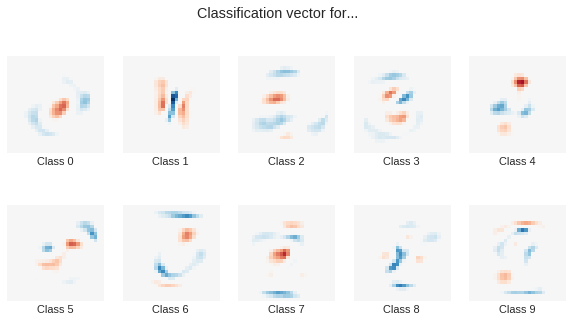

Finished Training
Ready to train taskClassifier
Ready to train operatorNetwork
Train Single NN
number 1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sparsity with L1 penalty: 67.77%
Test score with L1 penalty: 0.7237
Example run in 1.321 s


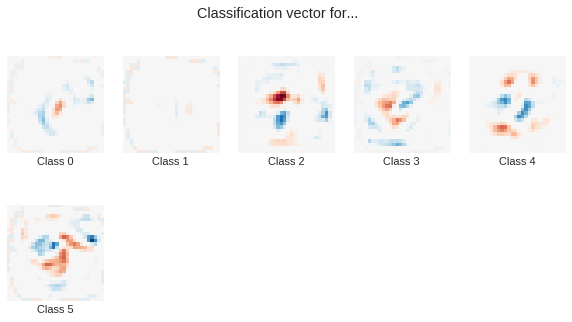

Finished Training
Train Single NN
number 2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sparsity with L1 penalty: 62.95%
Test score with L1 penalty: 0.8087
Example run in 1.113 s


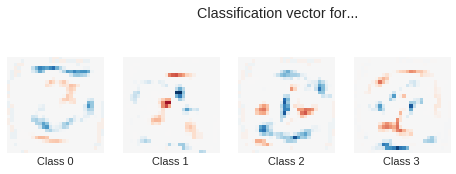

Finished Training
Ready to train taskClassifier
before training
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08251693e-03 -6.22758214e-03 -8.32576704e-03 -1.06566608e-02
 -1.36071941e-02 -1.85758043e-02 -2.41127541e-02 -2.95648532e-02
 -3.22168873e-02 -3.28848756e-02 -3.27297156e-02 -2.96741615e-02
 -2.95481494e-02 -2.71036638e-02 -2.19829021e-02 -1.84369366e-02
 -1.60242721e-02 -1.03780470e-02 -8.32486080e-03 -4.38069356e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.000000

In [0]:
c = Reflection()
#print(X_train[0])
c.train(X_train, y_train)

random_state = check_random_state(0)
permutation = random_state.permutation(X_test.shape[0])
X_test = X_test[permutation]
y_test = y_test[permutation]
X_test = X_test.reshape((X.shape[0], -1))
X_test = c.scaler.transform(X_test)
print("after transform")
print(X_test[0])
prediction = []
corr = 0
count = 0
for i in range(0, len(X_test)):
    count += 1
    pred = c.predict[X_test]
    if pred == y_test[i]:
        corr += 1
print(corr/count)

In [10]:
for i in range(0, len(prediction)):
    count += 1
    print("-------------")
    print(y_test[i])
    print(prediction[i])
    print("-------------")

-------------
8
5
-------------
-------------
4
5
-------------
-------------
0
5
-------------
-------------
7
5
-------------
-------------
5
5
-------------
-------------
8
5
-------------
-------------
3
5
-------------
-------------
1
5
-------------
-------------
1
5
-------------
-------------
3
5
-------------
-------------
6
5
-------------
-------------
3
5
-------------
-------------
8
5
-------------
-------------
7
5
-------------
-------------
1
5
-------------
-------------
5
5
-------------
-------------
4
5
-------------
-------------
8
5
-------------
-------------
1
5
-------------
-------------
3
5
-------------
-------------
0
5
-------------
-------------
2
5
-------------
-------------
8
5
-------------
-------------
6
5
-------------
-------------
7
5
-------------
-------------
5
5
-------------
-------------
4
5
-------------
-------------
0
5
-------------
-------------
0
5
-------------
-------------
2
5
-------------
-------------
2
5
-------------
--------

Automatically created module for IPython interactive environment
Sparsity with L1 penalty: 82.58%
Test score with L1 penalty: 0.8352
Example run in 45.996 s


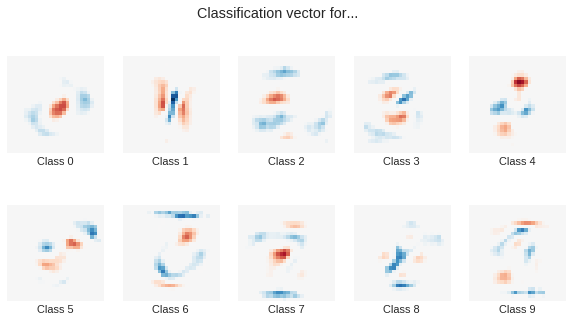

In [0]:
print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', cache = False, version=1, return_X_y=True)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()